### Exercice 1

#### Import

In [23]:
import keras as k
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split

#### Dataset

In [2]:
fashion = k.datasets.fashion_mnist

In [3]:
(X_train,y_train),(X_test,y_test) = fashion.load_data()
#Permet de séparer entre les images et les étiquettes et aussi de récupérer un ensemble d'entrainement et de test

#### On remet toutes les images ensemble ainsi que les etiquettes afin de reshape les images et refaire une séparation en ensembles d'entrainement et de test pour que l'ensemble de test soit plus petit.

In [4]:
images = np.concatenate((X_train,X_test),axis=0)
etiquettes = np.concatenate((y_train,y_test),axis=0)

In [5]:
images = images.reshape(images.shape[0],28,28,1)
X = images / 255
y = etiquettes

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#### On affiche une image avec son etiquette

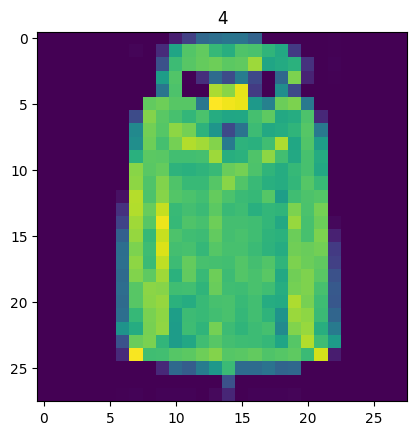

In [10]:
plt.imshow(X_train[6])
plt.title(y_train[6])
plt.show()

### Q3

#### On construit le modèle

In [11]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Aplatir les tableaux 2D pour des couches entièrement connectées
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

c:\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### On entraine le modèle

In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=X_train,y=y_train, epochs=10)

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7963 - loss: 0.5741
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8919 - loss: 0.3017
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9104 - loss: 0.2480
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9226 - loss: 0.2132
Epoch 5/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9331 - loss: 0.1842
Epoch 6/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9385 - loss: 0.1631
Epoch 7/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9462 - loss: 0.1452
Epoch 8/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9520 - loss: 0.1307
Epoch 9/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9543 - loss: 0.1235
Epoch 10/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9588 - loss: 0.1126


#### Q4 : On evalue la précision du modèle sur à l'ensemble de test

In [13]:
model.evaluate(X_test, y_test)

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9145 - loss: 0.2641


[0.27976617217063904, 0.9144285917282104]

In [16]:
loss,acc = model.evaluate(X_test, y_test, verbose=2)

print(f"accuracy: {acc}")

438/438 - 1s - 2ms/step - accuracy: 0.9144 - loss: 0.2798
accuracy: 0.9144285917282104


In [17]:
predictions = model.predict(X_test)
predits = np.argmax(predictions, axis=1)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


#### On regarde si les predictions sont bonnes

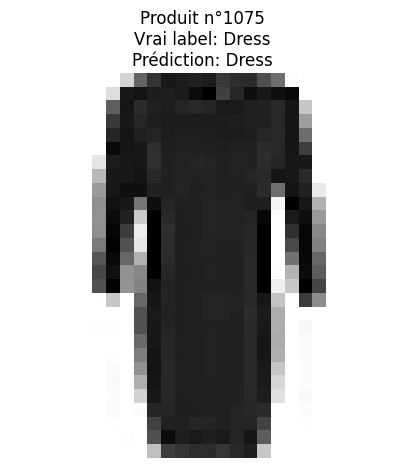

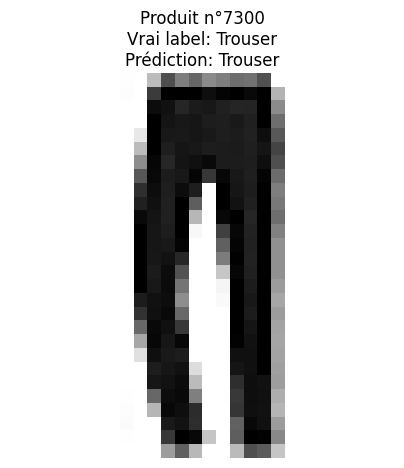

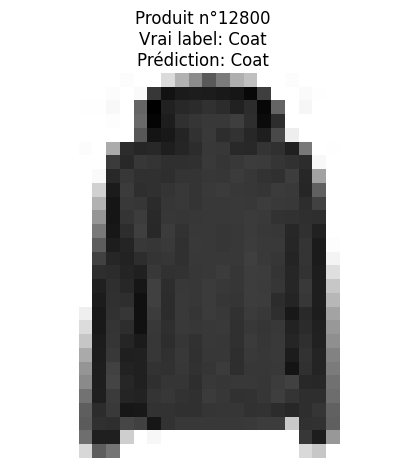

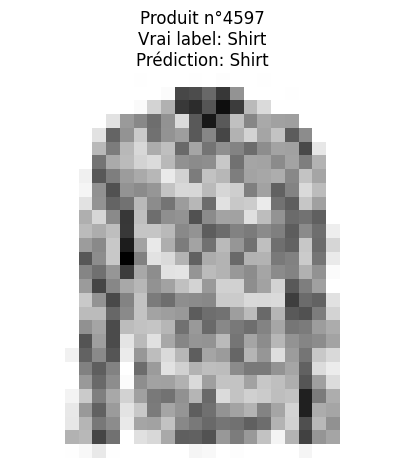

In [27]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def prediction(num,image, vrai_label, pred_label):
    plt.figure(figsize=(5,5))
    plt.imshow(image.reshape(28, 28), cmap=plt.cm.binary)  
    plt.title(f"Produit n°{num}\nVrai label: {class_names[vrai_label]}\nPrédiction: {class_names[pred_label]}")
    plt.axis('off')
    plt.show()

i = random.randint(0, len(y_test))
j = random.randint(0, len(y_test))
l = random.randint(0, len(y_test))
m = random.randint(0, len(y_test))
prediction(i,X_test[i], y_test[i], predits[i])
prediction(j,X_test[j], y_test[j], predits[j])
prediction(l,X_test[l], y_test[l], predits[l])
prediction(m,X_test[m], y_test[m], predits[m])

